In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [57]:
df = pd.read_csv('PassOrFail.csv')

In [59]:
df

,Exam_Score,Pass/Fail
0,51,1
1,92,1
2,14,0
3,71,1
4,60,1
...,...,...
95,39,0
96,84,1
97,79,1
98,81,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Exam_Score  100 non-null    int64
 1   Pass/Fail   100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [63]:
df.describe()

,Exam_Score,Pass/Fail
count,100.000000,100.000000
mean,51.310000,0.580000
std,29.704163,0.496045
min,1.000000,0.000000
25%,22.500000,0.000000
50%,53.500000,1.000000
75%,77.000000,1.000000
max,100.000000,1.000000


In [65]:
percentage = df['Pass/Fail'].value_counts(normalize=True)*100
percentage

Pass/Fail
1    58.0
0    42.0
Name: proportion, dtype: float64

Text(0.5, 1.0, 'PIE CHART OF PASS OR FILE  ')

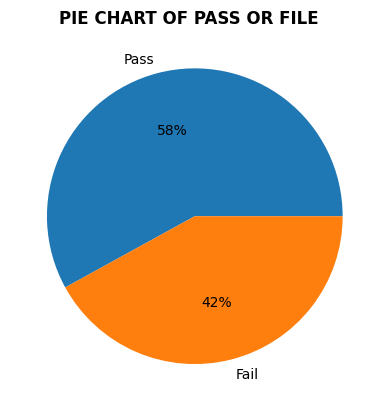

In [67]:
plt.pie(percentage, labels=['Pass','Fail'],autopct='%1.f%%')
plt.title('PIE CHART OF PASS OR FILE  ', fontweight='bold')

array([[<Axes: title={'center': 'Exam_Score'}>,
        <Axes: title={'center': 'Pass/Fail'}>]], dtype=object)

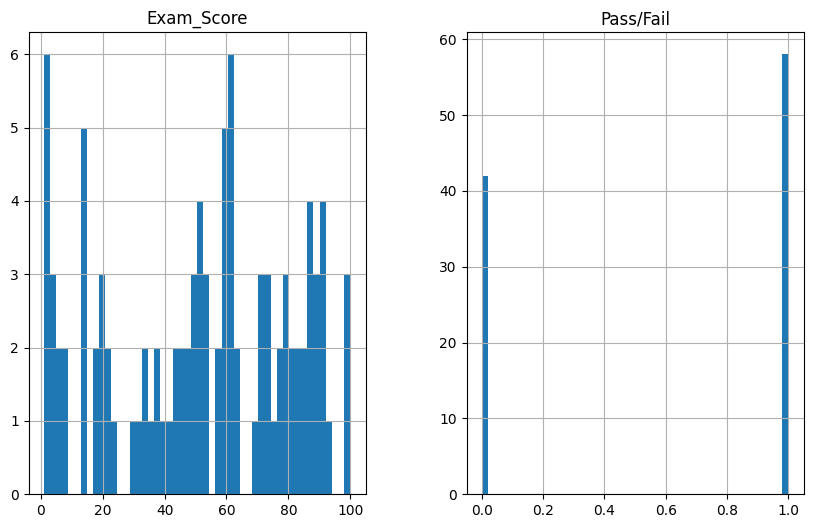

In [69]:
df.hist(bins=50,figsize=(10,6))

<Axes: ylabel='Exam_Score'>

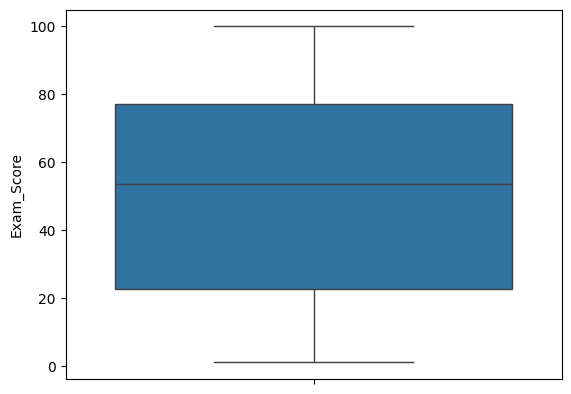

In [71]:
sns.boxplot(data=df['Exam_Score'])

In [81]:
df['Exam_Score']

0     51
1     92
2     14
3     71
4     60
      ..
95    39
96    84
97    79
98    81
99    52
Name: Exam_Score, Length: 100, dtype: int64

In [79]:
df.columns

Index(['Exam_Score', 'Pass/Fail'], dtype='object')

In [85]:
df.corr

<bound method DataFrame.corr of     Exam_Score  Pass/Fail
0           51          1
1           92          1
2           14          0
3           71          1
4           60          1
..         ...        ...
95          39          0
96          84          1
97          79          1
98          81          1
99          52          1

[100 rows x 2 columns]>

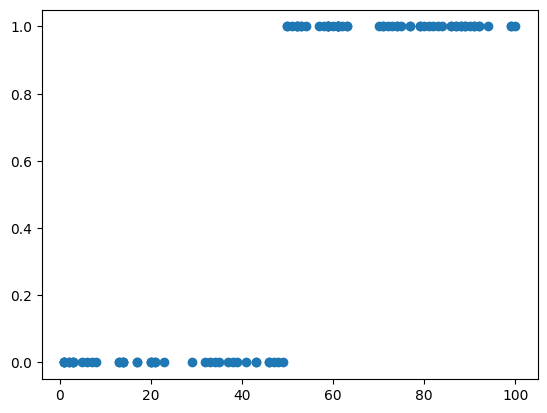

In [89]:
plt.scatter(df['Exam_Score'],df['Pass/Fail'])

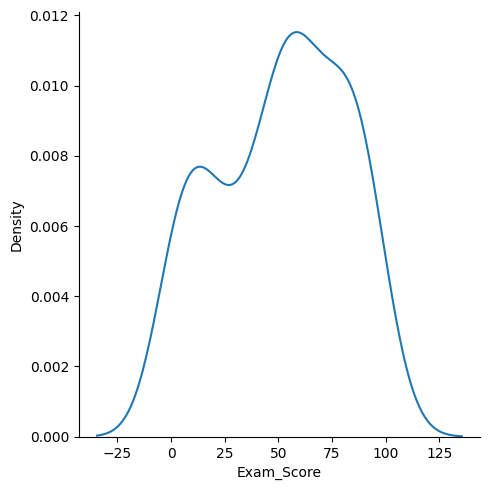

In [91]:
sns.displot(df['Exam_Score'],kind='kde')

In [115]:
# independent and dependent features 
X = df[['Exam_Score']]
y = df['Pass/Fail']

In [119]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [123]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((75, 1), (75,), (25, 1), (25,))

In [127]:
# stanadadization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model training

In [199]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1',solver='liblinear')

In [201]:
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

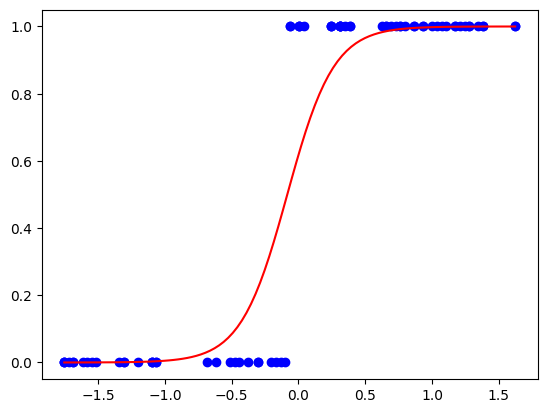

In [203]:
x_values = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  # Smooth curve
y_prob = model.predict_proba(x_values)[:, 1]

plt.scatter(X_train, y_train, label='Data Points', color='blue')
plt.plot(x_values, y_prob, label='Sigmoid Curve', color='red')


In [205]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [208]:
y_pred = model.predict(X_test)

In [212]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

1.0
[[11  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



### Decission boundary curve 

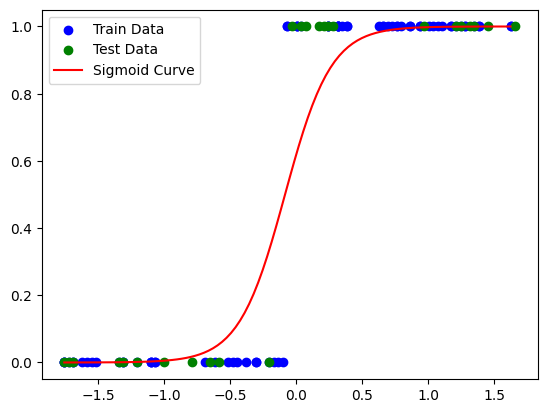

In [214]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(x_values, model.predict_proba(x_values)[:, 1], color='red', label='Sigmoid Curve')
plt.legend()
plt.show()

### AFTER CHANGING THE THRESHOLD VALUE By understanding ROC 

In [300]:
y_test_prob = model.predict_proba(X_test)[:,-1]
threshold = 0.3
y_pred_custom = (y_test_prob>=threshold).astype(int)

In [302]:
y_pred_custom.size

25

In [304]:
score = accuracy_score(y_test,y_pred_custom)
print(score)
cm = confusion_matrix(y_test,y_pred_custom)
print(cm)
print(classification_report(y_test,y_pred_custom))

0.96
[[10  1]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.93      1.00      0.97        14

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

